# **Flight Price Prediction Project**

Professor - Mohammad Mahdavi

### Introduction:

Flight ticket prices change a lot depending on the time, airline, number of stops, and many other factors, so it becomes difficult for people to know the right time to book a ticket. At the same time, airlines also benefit if they know when prices might go high or low, so they can plan offers and discounts.

In this project, I worked on predicting flight fares using machine learning. For this, I used the Kaggle Flight Price Prediction dataset which contains details like airline name, travel date, route, duration, stops, and final ticket price. Using this data, I built a model that can predict the flight price based on the given information. As a data Scientist i will try ti train best model to make good prediction with more accuracy.

To perform the prediction, I used three machine learning models:

**Gradient Boosting Regressor

XGBoost

Random Forest Regressor**

I then compared them to see which one gives the best price prediction result.



### Importing  All Libraries

In [18]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore", category=UserWarning)


## Importing the dataset

Please refer this link for the DataSet "https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv"

This dataset is already cleaned and uploded on Kaggle website to make Prediction and perform Operation and learn.

In [19]:
df = pd.read_csv("data/FlightPredictionDataset.csv")


## **Displaying the DataSet**

This DataSet Contains details like

**airline name - Name of the Airlines**

**flight number - Flight Number**

 **route - Source and destination city**

 **duration - Time taken to travel**

 **stops - Any layover in Journey which is also a key feature in Price hike and reduction**

 **price - Price of the fight in given journey**


**For this my Target Data is Price and  the rest column we use as Features data.**

In [3]:
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Preprocessing:

Checking for missing values, droping missing values rows.

In [4]:
print(df.isnull().sum())
df = df.drop(columns=["Unnamed: 0"])

df.dropna(inplace=True)

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

print("\nData After Encoding:")
df.head()


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Data After Encoding:


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Dividing the table into features and targets

Price is our main target label

Rest all column will be features data


In [5]:
X = df.drop("price", axis=1)
y = df["price"]

### Identify categorical & numerical features

In [6]:

cat_col = X.select_dtypes(include='object').columns
num_col = X.select_dtypes(exclude='object').columns


### Preprocessing Pipeline (Encoding + Scaling)


In [7]:


encoder.fit(X[cat_col])

preprocess = ColumnTransformer([
    ('cat', encoder, cat_col),
    ('num', StandardScaler(), num_col)
])


**Splitting the DataSet into Train and Test Data to make prediction**

60 % of Data will use as Train data and rest 40 % ,I will be using as Test Data using train_test_split library. This is done due to less time taking on training model.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**Building Pipeline with Three model for prediction**

These models are tuned to improve prediction accuracy and reduce overfitting. RandomForest uses 300 trees with depth control and feature sampling for stability. GradientBoosting trains 250 sequential learners with lower learning rate for refined improvement. XGBoost is optimized with regularization, subsampling, and boosted rounds for faster, more accurate flight price prediction.


In [16]:
models = {
    "RandomForest" : RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ),

    "GradientBoosting" : GradientBoostingRegressor(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42
    ),

    "XGBoost" : XGBRegressor(
        n_estimators=400,
        learning_rate=0.03,
        max_depth=7,
        colsample_bytree=0.8,
        subsample=0.85,
        reg_lambda=2,
        reg_alpha=1,
        gamma=0.2,
        random_state=42,
        objective='reg:squarederror'
    )
}


**Predicting the result**

This loop trains and evaluates all models stored in the models results. For each model, a pipeline is created combining preprocessing and regression. The model is trained using the training dataset and then predicts prices on the test set. Performance is measured using R², RMSE, and MAE, which reflect accuracy and error rate. The results of each model are stored in a dictionary and printed for comparison, helping identify which model performs best for flight price prediction.

In [17]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessing", preprocess),
                               ("model", model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = [r2, rmse, mae]
    print(f"\n {name} Results:")
    print("R2 Score     :", r2)
    print("RMSE         :", rmse)
    print("MAE          :", mae)


 RandomForest Results:
R2 Score     : 0.7166981457146162
RMSE         : 12088.544011945418
MAE          : 9906.321561213419

 GradientBoosting Results:
R2 Score     : 0.9663947403827525
RMSE         : 4163.445795636283
MAE          : 2463.55331869511

 XGBoost Results:
R2 Score     : 0.9723408222198486
RMSE         : 3777.1904902983115
MAE          : 2180.774658203125


Predicting the best model and Comparison

This block gives the best-performing model from the results by comparing R² scores. The function identifies the model with the highest R² value, indicating the most accurate prediction. The results of all models are then organized into a DataFrame for clear tabular comparison. The table displays R² Score, RMSE, and MAE for each algorithm, making it easy to analyze performance differences. Finally, the comparison result is printed, helping choose the most suitable model for flight price prediction.

In [20]:
best_model_name = max(results, key=lambda x: results[x][0])
print(f"\n🚀 Best Performing Model is: {best_model_name}")

results_df = pd.DataFrame(results, index=["R2 Score","RMSE","MAE"]).T
print("\n🔥 Model Performance Comparison:\n")


print(results_df)


🚀 Best Performing Model is: XGBoost

🔥 Model Performance Comparison:

                  R2 Score          RMSE          MAE
RandomForest      0.716698  12088.544012  9906.321561
GradientBoosting  0.966395   4163.445796  2463.553319
XGBoost           0.972341   3777.190490  2180.774658


Now pLotting the performance metrics of all trained models using a bar graph. The results_df.plot() command plots the R², RMSE, and MAE values for each model, with a figure size of 10×5 for better visualization. The graph is given a title "Model Performance Comparison" and the y-axis is labeled Score. Finally, plt.show() displays the bar chart, helping compare model performance visually and quickly identify which model performs best.

<Figure size 1000x500 with 0 Axes>

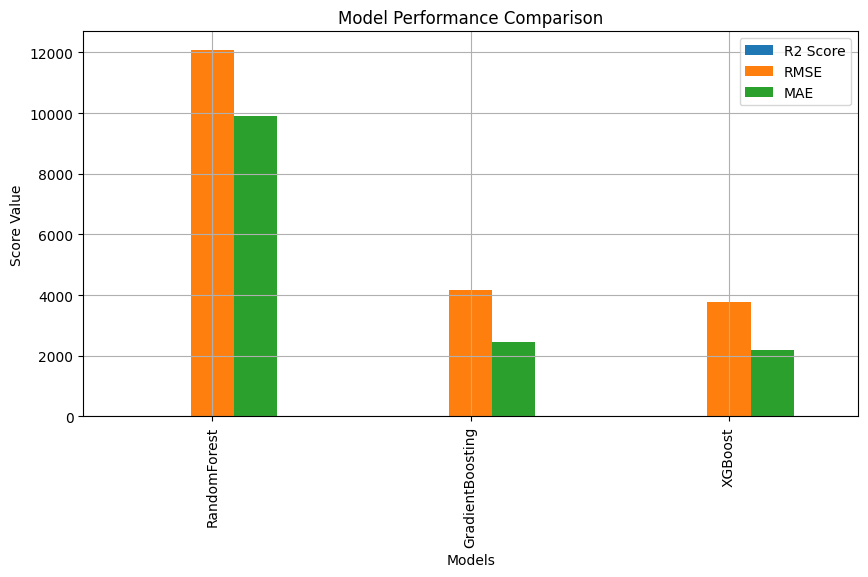

In [21]:
plt.figure(figsize=(10,5))
results_df.plot(kind="bar", figsize=(10,5))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score Value")
plt.grid(True)
plt.show()

## Retrain the best model to predict the best price for a example set of airlines data

In [22]:

best_model = models[best_model_name]

final_pipeline = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", best_model)
])

final_pipeline.fit(X, y)
print(f"\n💡 Final Model Ready: {best_model_name}")



💡 Final Model Ready: XGBoost


## checking feature columns used in training for setting an example

In [23]:

print("\nModel Expecting Columns:\n", X.columns)



Model Expecting Columns:
 Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')


This Example set an experiment to get the price value of fight operating with features and predicting the price.

In [24]:

sample = pd.DataFrame([{
    "airline": "IndiGo",
    "flight": "6E-973",
    "source_city": "Delhi",
    "departure_time": "Morning",
    "stops": "one",
    "arrival_time": "Night",
    "destination_city": "Mumbai",
    "class": "Economy",
    "duration": 2.5,
    "days_left": 20
}])

pred = final_pipeline.predict(sample)
print(f"\n Predicted Ticket Price: ₹ {round(pred[0],2)}")


 Predicted Ticket Price: ₹ 3144.1201171875


## **Conclusion:**

In this project, I have trained three model pipeline to make prediction of flight price and also predict price for a manual given sample Data with the best model (**XGBoost**).
In this project i have used three models:
**Gradient Boosting Regressor**

**XGBoost**

**Random Forest Regressor**

which give R2 Score of 67%, 96%, 97%. So This conclude the best model for this dataset is XGBoost with 97% of accuracy with the help of **Hyperparameter Tuning**.

This percentage of accuracy make this model to efficient to companies to predict the price of Airline according to Flight details as features table. This will help them to grow business and they can plan offers
and discounts.

For Model would definitely implemented in many online Airline Ticket Websites to predict the future flights price according to previous DataSets. We just need to upload current dataset and guve a sample example to forecast the price the Flight


Thanks for your Attentions.


Name       -  Aniket Sonu

Student ID -  GH1048274

Email Id   -  Aniket.Sonu@gisma-student.com